In [69]:
import pandas as pd
import numpy as np
import re
import string
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data = pd.read_csv('data/master.csv')

In [7]:
#### MOVE TO DATA CLEANUP!
def remove_link(text):
    return re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)

In [8]:
data['Comment'] = data['Comment'].apply(lambda x: remove_link(str(x)))

In [9]:
data['EditorPick'] = data['EditorPick'].apply(lambda x: 0 if x == 'False' else x)
data['EditorPick'] = data['EditorPick'].apply(lambda x: 1 if x == 'True' else x)
data['EditorPick'] = data['EditorPick'].astype(float)

In [10]:
data['Recommendations'] = data['Recommendations'].apply(lambda x: 0 if type(x) == str else x)

In [11]:
def word_count(text):
    out = text.translate(string.maketrans("",""), string.punctuation)
    return len(out.split())

In [12]:
data['word_count'] = data['Comment'].apply(lambda x: word_count(str(x)))

In [30]:
data['Rec'] = data['Recommendations'].apply(lambda x: 1 if x > 0 else 0)

In [56]:
np.mean(data['Rec']) 

0.65465606656408504

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140376 entries, 0 to 140375
Data columns (total 21 columns):
Unnamed: 0             140376 non-null int64
Comment                140376 non-null object
URL                    140371 non-null object
Recommendations        140371 non-null float64
Locations              140368 non-null object
EditorPick             140371 non-null float64
userID                 140371 non-null float64
date                   140368 non-null float64
Sentiment              140376 non-null float64
Sentiment_sent         140376 non-null float64
Sentiment_b            140376 non-null int64
Sentiment_b_sent       140376 non-null int64
Subjectivity           140376 non-null float64
Subjectivity_sent      140376 non-null float64
Subjectivity_b         140376 non-null int64
Subjectivity_b_sent    140376 non-null int64
Candidate              140376 non-null object
State                  72003 non-null object
City                   112594 non-null object
word_count   

In [60]:
col = ['State']

encoders = {}
le = preprocessing.LabelEncoder()
le.fit(data[col])
encoders[col] = le
data[col] = le.transform(data[col])

/Users/datascientist/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/datascientist/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:198: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


TypeError: unhashable type: 'list'

In [61]:
data['State'].value_counts()

NY    14104
CA     7741
NJ     4672
FL     3573
MA     3555
TX     3270
VA     2297
PA     2115
CT     1884
IL     1854
MD     1854
OH     1805
NC     1778
MI     1726
OR     1496
CO     1376
WA     1318
DC     1276
AZ     1129
MN     1068
VT     1027
GA      996
ME      924
NM      843
NH      836
WI      812
SC      812
TN      482
IN      474
LA      466
IA      462
RI      393
NV      372
MO      363
UT      320
MT      287
OK      279
KY      236
AL      216
KS      202
ID      201
MS      183
DE      182
AK      157
HI      152
AR      139
NE      104
WV       58
WY       46
SD       33
PR       25
ND       22
GU        6
VI        2
dtype: int64

In [31]:
columns = ['EditorPick', 'Sentiment_sent', 'Subjectivity_sent', 'word_count', 'Rec']
reg = data[columns]                                                                                                                                                                                                                                                                                                                

(0, 600)

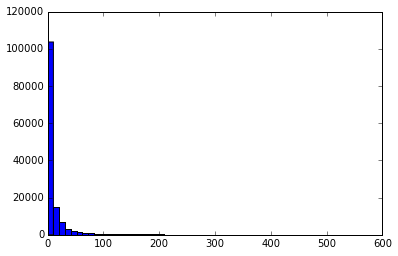

In [54]:
recs = data['Recommendations'].values
recs = np.nan_to_num(recs)
plt.hist(recs, bins=300)
plt.xlim(0,600)

In [40]:
X = reg.drop('Rec', axis = 1).values
X = np.nan_to_num(X)
y = reg['Rec'].values

In [41]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)

In [42]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print 'Accuracy: %f'%(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.578135


In [ ]:
### Naives Bayes, SVM

In [65]:
commentOnly = data[['Comment', 'Rec']]

In [107]:
X = commentOnly['Comment']
y = commentOnly['Rec'].values
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)

In [108]:
#type(commentOnly.loc[0,'Comment'])

In [112]:
vectorizer = TfidfVectorizer(stop_words = 'english')

vectorized_X_train  = vectorizer.fit_transform(X_train)
vectorized_X_test = vectorizer.transform(X_test)

In [ ]:
print vectorized_X_train.shape
print y_train.shape

(98263, 64621)
(98263,)


In [ ]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(vectorized_X_train, y_train)

y_pred = rf.predict(vectorized_X_test)
print 'Accuracy: %f'%(metrics.accuracy_score(y_test, y_pred))